### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data set

path = r'/Users/peimei/09-2023 Instacart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))
ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,no_of_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,count_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [3]:
ords_prods_custs['add_to_cart_order'].value_counts(dropna = False)

1      3209914
2      3053740
3      2867360
4      2661008
5      2439325
        ...   
138          1
143          1
140          1
141          1
139          1
Name: add_to_cart_order, Length: 145, dtype: int64

In [4]:
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 33 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   order_day_of_week             int64   
 4   order_hour_of_day             int64   
 5   no_of_days_since_last_order   float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   product_name                  object  
 10  aisle_id                      int64   
 11  department_id                 int64   
 12  prices                        float64 
 13  merge_result                  category
 14  price_range_loc               object  
 15  busiest day                   object  
 16  busiest days                  object  
 17  busiest_period_of_day         object  
 18  

**Comment:
<br>There is PII data in two columns "first_name" and "surname." Necessary measure is to remove these two cloumns from the dataset for the rest of my analysis.**

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Drop two columns containing PII data

ords_prods_custs_noPII = ords_prods_custs.drop(columns = ['first_name','surname'])


In [6]:
# Confirm the output

ords_prods_custs_noPII.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399732 entries, 0 to 32399731
Data columns (total 31 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   order_day_of_week             int64   
 4   order_hour_of_day             int64   
 5   no_of_days_since_last_order   float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   product_name                  object  
 10  aisle_id                      int64   
 11  department_id                 int64   
 12  prices                        float64 
 13  merge_result                  category
 14  price_range_loc               object  
 15  busiest day                   object  
 16  busiest days                  object  
 17  busiest_period_of_day         object  
 18  

**Comment:
<br>Both "first_name" and "surname" colums have been removed.**

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Create lists of states according to the regions

Region_1 =['Maine',
'New Hampshire',
'Vermont',
'Massachusetts',
'Rhode Island',
'Connecticut',
'New York',
'Pennsylvania',
'New Jersey']

Region_2 =['Wisconsin',
'Michigan',
'Illinois',
'Indiana',
'Ohio',
'North Dakota',
'South Dakota',
'Nebraska',
'Kansas',
'Minnesota',
'Iowa',
'Missouri']

Region_3 =['Delaware',
'Maryland',
'District of Columbia',
'Virginia',
'West Virginia',
'North Carolina',
'South Carolina',
'Georgia',
'Florida',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Oklahoma',
'Texas',
'Arkansas',
'Louisiana']

Region_4 =['Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Alaska',
'Washington',
'Oregon',
'California',
'Hawaii']

In [8]:
# Use loc() to assign labels

ords_prods_custs_noPII.loc[ords_prods_custs_noPII['state'].isin(Region_1), 'region'] = 'Northeast'

In [9]:
ords_prods_custs_noPII.loc[ords_prods_custs_noPII['state'].isin(Region_2), 'region'] = 'Midwest'

In [10]:
ords_prods_custs_noPII.loc[ords_prods_custs_noPII['state'].isin(Region_3), 'region'] = 'South'

In [11]:
ords_prods_custs_noPII.loc[ords_prods_custs_noPII['state'].isin(Region_4), 'region'] = 'West'

In [12]:
# Check output

ords_prods_custs_noPII['region'].value_counts(dropna = False).sort_index()

Midwest       7596065
Northeast     5721892
South        10790096
West          8291679
Name: region, dtype: int64

In [13]:
# Examine whether there is a difference between regions in spending habits
# Create a crosstab between region and spending_flag 

cross_region_spend = pd.crosstab(ords_prods_custs_noPII['region'], ords_prods_custs_noPII['spending_flag'], dropna = False)

In [14]:
cross_region_spend

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


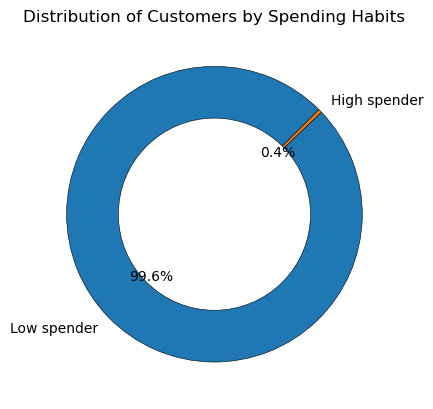

In [15]:
spend_counts = ords_prods_custs_noPII['spending_flag'].value_counts()
donut_spend_habit = spend_counts.plot.pie(startangle = 45,
    autopct='%.1f%%',
    labeldistance = 1.1,
    wedgeprops={'edgecolor':'black','linewidth':.4})

centre_circle = plt.Circle((0,0),0.65,
                           color='black', 
                           fc='white',
                           linewidth=.4)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Customers by Spending Habits')
plt.ylabel(None)
plt.show()

In [16]:
# Export viz 

donut_spend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'donut_spend_habits.png'))

### Observations:
**As the proportion of "High spenders" (0,4%) is almost non-existing in our customer base, it's not very interesting to see how the spending habits vary across the regions. As an alternative, I suggest we look at how the sales of different price ranges of products perform across regions.**<br>

Note:<br>
Low spender: The mean of the prices of products purchased by a user is lower than 10.<br>
High spender: The mean of the prices of products purchased by a user is higher than or equal to 10.

In [17]:
# Assigning flags

def price_label(row):
    
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif (row['prices'] > 15):
        return 'High-range product'
    else: return 'Not enough data'

In [18]:
# Apply the function
ords_prods_custs_noPII['price_range'] = ords_prods_custs_noPII.apply(price_label, axis = 1)

In [19]:
price_ranges = ords_prods_custs_noPII['price_range'].value_counts(dropna = False).sort_values(ascending = True)

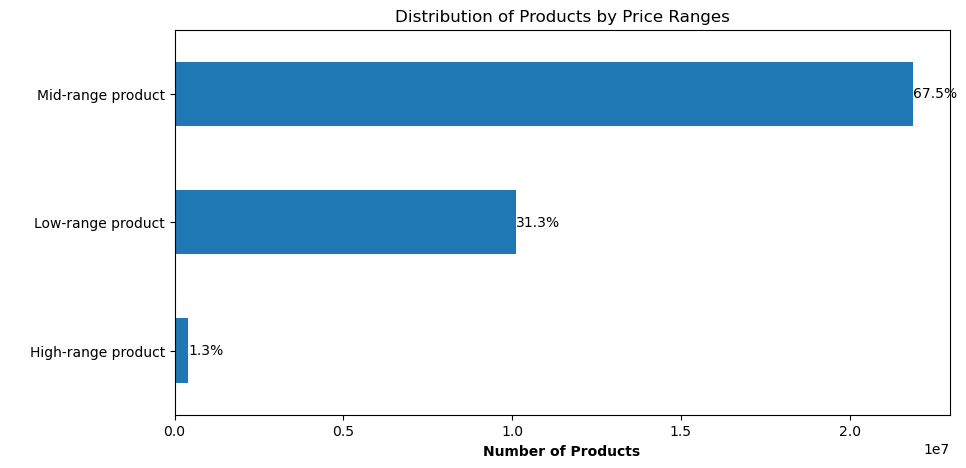

In [20]:
# Create the horizontal bar chart
bar_price_range = price_ranges.plot.barh(figsize=(10,5))
        
# Add percentages to each bar
total = price_ranges.sum()
for index, value in enumerate(price_ranges):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.1f}%', ha='left', va='center')

# Set labels and title
plt.xlabel('Number of Products', fontweight = 'bold')
plt.ylabel(' ')
plt.title('Distribution of Products by Price Ranges')

# Export viz 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations','bar_price_range.png'), dpi=100, bbox_inches='tight')



In [21]:
cross_region_price_range = pd.crosstab(ords_prods_custs_noPII['region'], ords_prods_custs_noPII['price_range'], dropna = False)
cross_region_price_range

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,96658,2372304,5127103
Northeast,72358,1792943,3856591
South,137601,3368338,7284157
West,105934,2592736,5593009


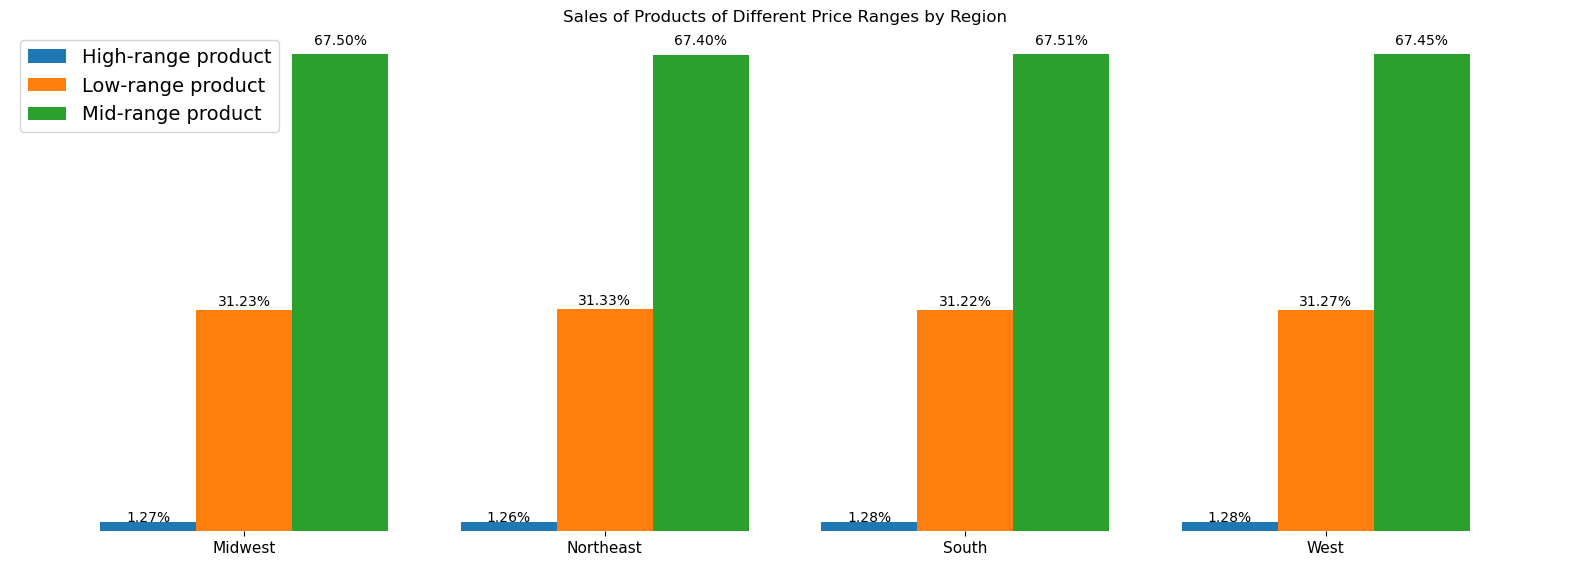

In [22]:
# Normalize result
cross_region_price_range_pct = cross_region_price_range.div(cross_region_price_range.sum(1), axis=0)

ax = cross_region_price_range_pct.plot(kind='bar',figsize=(20,6.5),width = 0.8,edgecolor=None)
plt.legend(labels=cross_region_price_range.columns,fontsize= 14)
plt.title("Sales of Products of Different Price Ranges by Region")

plt.xticks(fontsize=11, rotation = 0)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
plt.xlabel(' ')

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

In [23]:
# Export viz 

ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_region_price_range.png'))

### Observations:
**1. All region share the same distribution of the three product categories.**  
**2. The best performing products are mid-range products across all regions, followed by low-ranged products and lastly high-range products taking up.**

### 4.  The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [24]:
# Create an exclusion flag using loc()

ords_prods_custs_noPII.loc[ords_prods_custs_noPII['max_order'] <5 , 'low_activity'] = 'max_order < 5'

In [25]:
ords_prods_custs_noPII.loc[ords_prods_custs_noPII['max_order'] >=5 , 'low_activity'] = 'max_order >=5'

In [26]:
ords_prods_custs_noPII['low_activity'].value_counts(dropna = False)

max_order >=5    30959687
max_order < 5     1440045
Name: low_activity, dtype: int64

In [27]:
# Exclude rows of "low activity customers"

ords_prods_custs_noPII_2 = ords_prods_custs_noPII[ords_prods_custs_noPII['low_activity'] == 'max_order >=5']
ords_prods_custs_noPII_2[['user_id','max_order']].head(10)

,user_id,max_order
0,1,10
1,1,10
2,1,10
3,1,10
4,1,10
5,1,10
6,1,10
7,1,10
8,1,10
9,1,10


In [28]:
ords_prods_custs_noPII_2[['user_id','max_order']].shape

(30959687, 2)

In [29]:
# Export the dataframe

ords_prods_custs_noPII_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_custs_noPII_without_low_activity.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [30]:
ords_prods_custs_noPII_2['age'].value_counts(dropna = False).sort_index()

18    478387
19    496029
20    480144
21    489013
22    490740
       ...  
77    477891
78    471021
79    508286
80    492669
81    485794
Name: age, Length: 64, dtype: int64

In [31]:
# Create Age flags (Young: 18 - 39, Middle-Aged: 40 - 59, Old: 60 and more)

ords_prods_custs_noPII_2.loc[(ords_prods_custs_noPII_2['age'] >= 18) & (ords_prods_custs_noPII_2['age'] <= 39), 'age_flag'] = 'Young'

/var/folders/nk/wd3333zj0f33cp4dc4rz3jxh0000gn/T/ipykernel_982/241823657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_noPII_2.loc[(ords_prods_custs_noPII_2['age'] >= 18) & (ords_prods_custs_noPII_2['age'] <= 39), 'age_flag'] = 'Young'


In [32]:
ords_prods_custs_noPII_2.loc[(ords_prods_custs_noPII_2['age'] >= 40) & (ords_prods_custs_noPII_2['age'] <= 59), 'age_flag'] = 'Middle-Aged'

In [33]:
ords_prods_custs_noPII_2.loc[ords_prods_custs_noPII_2['age'] >= 60, 'age_flag'] = 'Old'

In [34]:
ords_prods_custs_noPII_2['age_flag'].value_counts(dropna = False)

Young          10663440
Old            10572857
Middle-Aged     9723390
Name: age_flag, dtype: int64

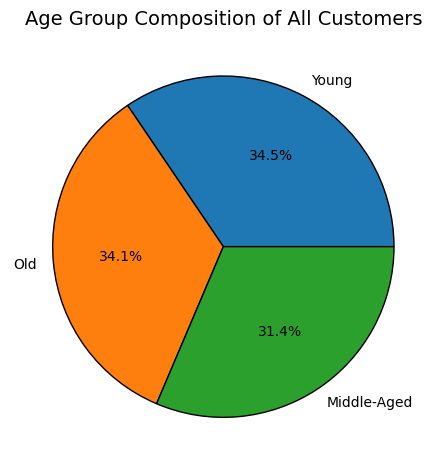

In [35]:
# Create a pie chart

age_flag_counts = {
    'Young': 8417672,
    'Old' : 8329349,
    'Middle-Aged' : 7664145
}

pie_age_groups = plt.pie(age_flag_counts.values(), labels = age_flag_counts.keys(), autopct = '%.1f%%',
       wedgeprops = {'edgecolor' : 'black'})
plt.title('Age Group Composition of All Customers', fontsize = 14)
plt.tight_layout()

# Export viz 

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'pie_age_groups.png'))

### Observations:
**Across the states, young and old adults each account for over one-third of our customers, while middle-aged adults represent just under one-third.**


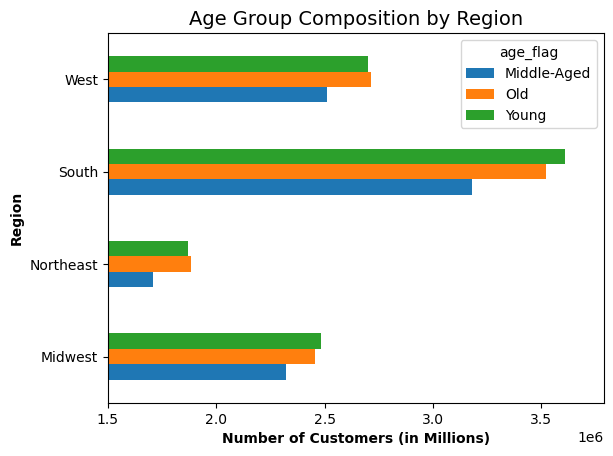

In [36]:
# Examine age group composition in each region
# Create a crosstab between region and age group compostion 

cross_region_age = pd.crosstab(ords_prods_custs_noPII_2['region'], ords_prods_custs_noPII_2['age_flag'], dropna = False)
bar_cross_region_age = cross_region_age.plot.barh()

plt.title('Age Group Composition by Region', fontsize = 14)
plt.xlabel('Number of Customers (in Millions)', fontweight = 'bold')
plt.ylabel('Region', fontweight = 'bold')
plt.xlim(1500000)
plt.show()

In [37]:
# Export viz 

bar_cross_region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_age.png'))

### Observations:
**The South and Midwest regions mirror the nationwide age group composition, with a predominance of young adults, followed by old adults and then middle-aged adults. However, in the West and Northeast regions, the old-adult group slightly surpasses the young-adult group in size.**

In [38]:
ords_prods_custs_noPII_2['income'].describe()

count    3.095969e+07
mean     9.965502e+04
std      4.309143e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676100e+04
75%      1.280810e+05
max      5.939010e+05
Name: income, dtype: float64

**Reference:**
<br>**"Median household income was 61,372 in 2017, an increase in real terms of 1.8 percent from the 2016 median of $60,309..."**
https://www.census.gov/content/dam/Census/library/publications/2018/demo/p60-263.pdf

In [39]:
# Creaet Income flags according to quartiles. 
# High income: >128147, Regular income: >61372 & <=128147, Low income: <=61372
# Reference: "Median household income was **$61,372** in 2017, an increase in real terms of 1.8 percent from the 2016 median of $60,309...
# https://www.census.gov/content/dam/Census/library/publications/2018/demo/p60-263.pdf

ords_prods_custs_noPII_2.loc[ords_prods_custs_noPII_2['income'] <= 61372, 'income_flag'] = 'Low income'

/var/folders/nk/wd3333zj0f33cp4dc4rz3jxh0000gn/T/ipykernel_982/2079776607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_noPII_2.loc[ords_prods_custs_noPII_2['income'] <= 61372, 'income_flag'] = 'Low income'


In [40]:
ords_prods_custs_noPII_2.loc[(ords_prods_custs_noPII_2['income'] > 61372) & (ords_prods_custs_noPII_2['income'] <= 128147) , 'income_flag'] = 'Regular income'

In [41]:
ords_prods_custs_noPII_2.loc[ords_prods_custs_noPII_2['income'] > 128147, 'income_flag'] = 'High income'

In [42]:
income_flag_counts = ords_prods_custs_noPII_2['income_flag'].value_counts(dropna = False)

In [43]:
income_flag_counts

Regular income    17130063
High income        7725681
Low income         6103943
Name: income_flag, dtype: int64

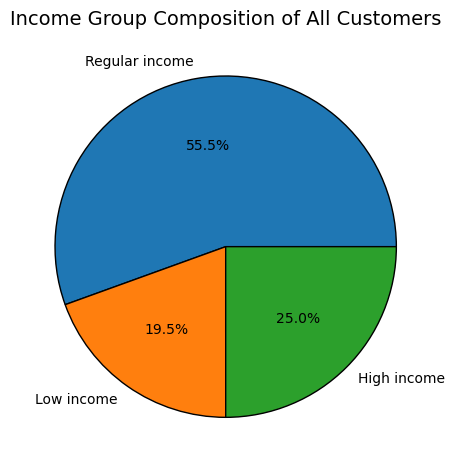

In [44]:
# Create a pie chart

income_flag_counts = {
    'Regular income': 13553065,
    'Low income' : 4755655,
    'High income' : 6102446
}

pie_income_groups = plt.pie(income_flag_counts.values(), labels = income_flag_counts.keys(), autopct = '%.1f%%',
       wedgeprops = {'edgecolor' : 'black'})
plt.title('Income Group Composition of All Customers', fontsize = 14)
plt.tight_layout()

# Export viz 

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'pie_income_groups.png'))


### Observations:
**Taking the nationwide median income (61,372) as the baseline for a regular-income and the third quartile value (128,147) as the baseline for a high-income, we have one quarter of our customers profiled as "high-income" earners, 55.5% as "regular-income" earners and 19.5% as "low-income" earners.**

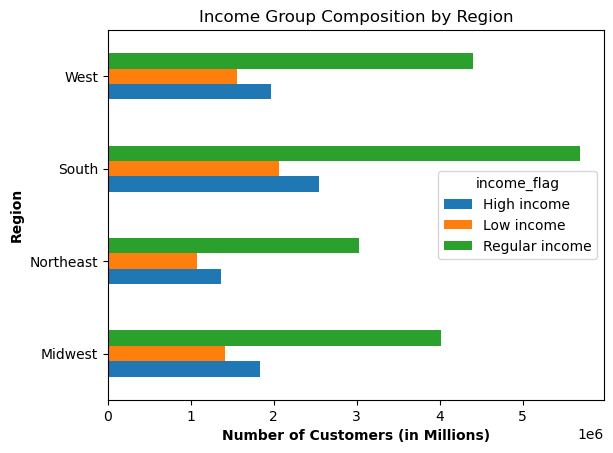

In [45]:
# Examine customer of different income levels across regions
# Create a crosstab between region and income_flag 

cross_region_income = pd.crosstab(ords_prods_custs_noPII_2['region'], ords_prods_custs_noPII_2['income_flag'], dropna = False)
bar_cross_region_income = cross_region_income.plot.barh()

plt.xlabel('Number of Customers (in Millions)', fontweight = 'bold')
plt.ylabel('Region', fontweight = 'bold')
plt.title('Income Group Composition by Region')

plt.show()

In [46]:
# Export viz 

bar_cross_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_income.png'))

### Observations:
**In all regions, the distribution of income groups closely mirrors the nationwide pattern. The majority of customers in every region fall within the category of regular-income earners. Moreover, the high-income group constitutes a larger portion of the customer base than the low-income group, indicating a consistent trend across the nation.**

In [47]:
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [48]:
# Rename column name to "department_id"

df_departments_2 = df_departments.rename(columns = {'Unnamed: 0':'department_id'})
df_departments_2

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
# Merge the main df with the df_departments


ords_prods_custs_noPII_3 = ords_prods_custs_noPII_2.merge(df_departments_2, on = 'department_id')

In [50]:
# Check output

ords_prods_custs_noPII_3.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,no_of_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,count_dependants,fam_status,income,region,price_range,low_activity,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,Mid-range product,max_order >=5,Young,Low income,beverages


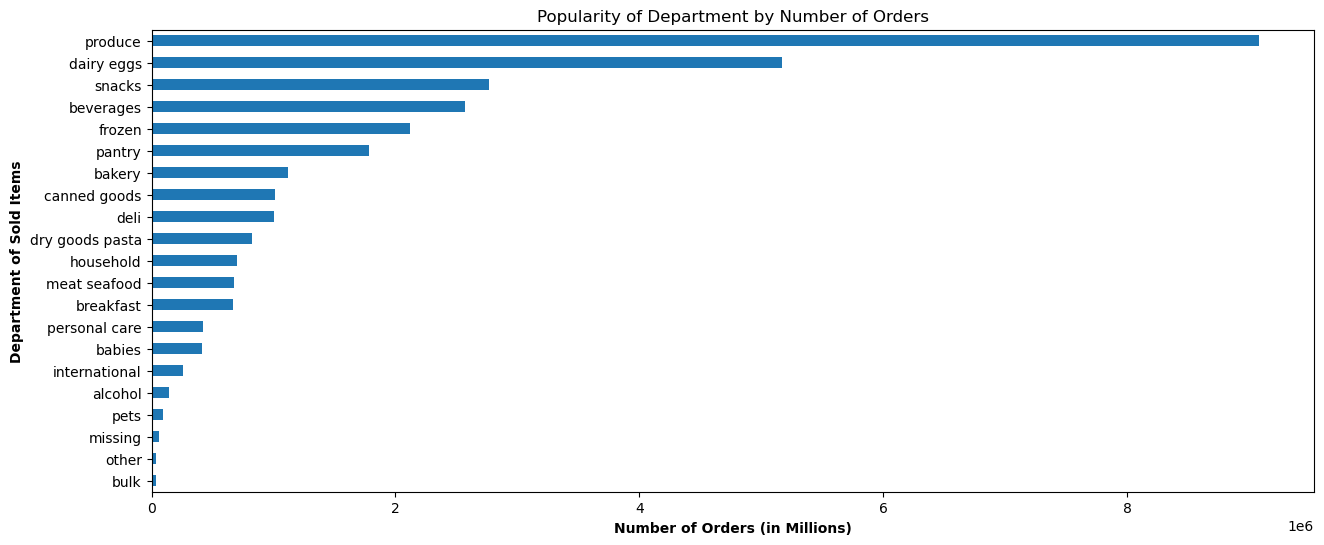

In [51]:
# Create a bar chart of departments
 
department_counts = ords_prods_custs_noPII_3['department'].value_counts()
department_counts = department_counts.sort_values(ascending = True) 
# Sort the DataFrame in descending order

# Increase the figure width to make it wider
fig, ax = plt.subplots(figsize=(15, 6))
bar_department = department_counts.plot.barh(ax = ax)

plt.xlabel('Number of Orders (in Millions)', fontweight = 'bold')
plt.ylabel('Department of Sold Items', fontweight = 'bold')
plt.title('Popularity of Department by Number of Orders')
plt.show()

In [52]:
# Export viz 

bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_department.png'))

### Observations:
**The 'Produce' department stands out as the clear favorite, boasting the highest count of orders by a significant margin. 'Dairy Eggs' secures a solid second place, making it the second most sought-after department.**

In [53]:
ords_prods_custs_noPII_3['count_dependants'].value_counts()

3    7771309
0    7738508
2    7731924
1    7717946
Name: count_dependants, dtype: int64

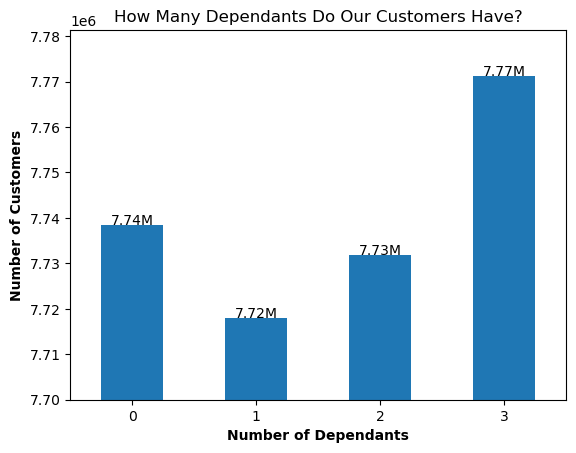

In [54]:
# Investigate Number of Dependents
# Create a bar chart of dependents

dependants_counts = ords_prods_custs_noPII_3['count_dependants'].value_counts().sort_index(ascending=False)
bar_dependants = dependants_counts.sort_index().plot.bar()

plt.xlabel('Number of Dependants', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')
plt.xticks(rotation = 0)
plt.title('How Many Dependants Do Our Customers Have?')
# Set the y-axis limits to start from 6 million
plt.ylim(7700000, dependants_counts.max() + 10000)
# Add data labels to the bars
for i, v in enumerate(dependants_counts.sort_index()):
    plt.text(i, v, f'{v / 1000000:.2f}M', ha='center', va='baseline', fontsize=10)
plt.show()


In [55]:
# Export viz 

bar_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_dependants.png'))

### Observations:
**Our customers are evenly distributed among four categories based on the number of dependants. One-quarter (25%) of our customers live in single-person households. The remaining three-quarters (75%) of our customers are distributed among households with a varying numbers of dependants.**

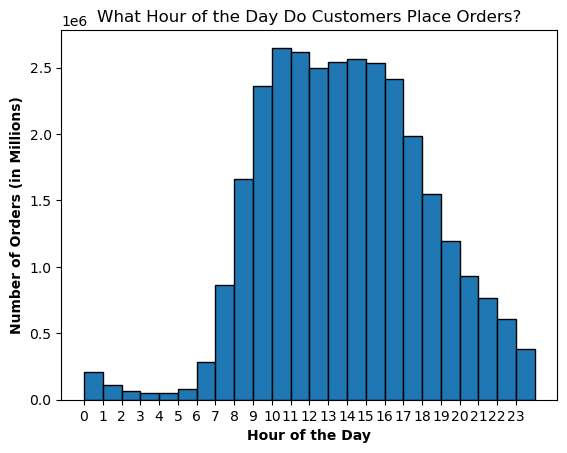

In [56]:
# Create a histogram of 'order_hour_of_day' with 24 bins
# Specify the bin edges to align bars with tick marks
bin_edges = range(0, 25)  # 25 bins, each representing an hour
hist_hour_of_day = ords_prods_custs_noPII_3['order_hour_of_day'].plot.hist(bins=bin_edges, edgecolor='k')  # 'k' for black edges

# Add axis labels
plt.xlabel('Hour of the Day', fontweight = 'bold')
plt.ylabel('Number of Orders (in Millions)', fontweight = 'bold')
plt.title('What Hour of the Day Do Customers Place Orders?')

# Set the x-axis ticks to be every 1 hour
plt.xticks(range(0, 24, 1))

# Show the plot
plt.show()

In [57]:
# Export viz 

hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'hist_hour_of_day.png'))

### Observations:
**The number of orders shows two distinct peaks, one between 10 am and 12 pm and another between 2 pm and 3 pm. After 3 pm, the number of orders steadily decreases until around 4 am, at which point it starts to rise again. <br>As expected, the number of orders remains low (between 37,000 and 160,000 orders) during the late-night hours.**

In [58]:
# Create a mapping dictionary for day names
day_mapping = {
    2: 'Mon.',
    3: 'Tues.',
    4: 'Wed.',
    5: 'Thurs.',
    6: 'Fri.',
    0: 'Sat.',
    1: 'Sun.'
}

# Use the map function to create a new 'day_name' column
ords_prods_custs_noPII_3['name_day_of_week'] = ords_prods_custs_noPII_3['order_day_of_week'].map(day_mapping)

# Probe the output
# ords_prods_custs_noPII_3[['order_day_of_week', 'name_day_of_week']].head(10)

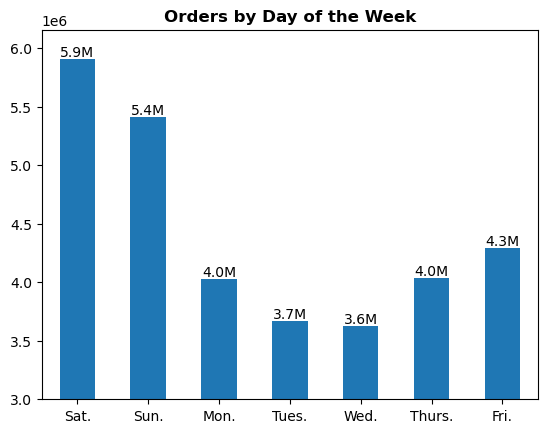

In [59]:
#Examine count of orders by day of the week

day_of_week_counts = ords_prods_custs_noPII_3['name_day_of_week'].value_counts()
# Define the desired order of days
desired_order = ['Sat.', 'Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.']

# Reorder the index based on the desired order
day_of_week_counts = day_of_week_counts.reindex(desired_order)

# Create a vertical bar chart
bar_day_of_week = day_of_week_counts.plot.bar()

plt.title('Orders by Day of the Week', fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(3000000, day_of_week_counts.max() + 250000)

# Add data labels to the bars
for i, v in enumerate(day_of_week_counts):
     plt.text(i, v, f'{v / 1_000_000:.1f}M', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [60]:
# Export viz 

bar_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_day_of_week.png'))

### Observations:
**We can see that weekend days, namely Saturday and Sunday, are the busiest in terms of orders. On the other hand, Wednesday stands out as the least busy day of the week for orders.**

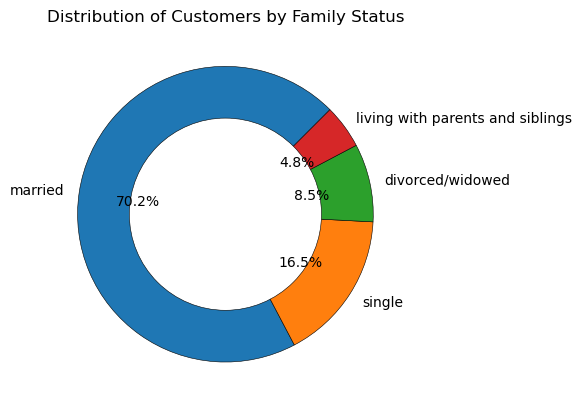

In [61]:
fam_status_counts = ords_prods_custs_noPII_3['fam_status'].value_counts()
pie_fam_status = fam_status_counts.plot.pie(startangle = 45,
    autopct='%.1f%%',
    labeldistance = 1.1,
    wedgeprops={'edgecolor':'black','linewidth':.4})

centre_circle = plt.Circle((0,0),0.65,
                           color='black', 
                           fc='white',
                           linewidth=.4)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Customers by Family Status')
plt.ylabel(None)

# Save the figure as a PNG image with specified dimensions and DPI
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10_Visualizations', 'pie_fam_status.png'), dpi=100, bbox_inches='tight')


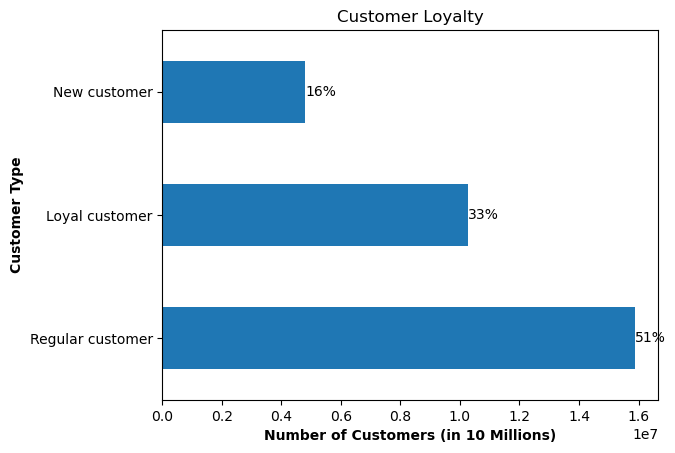

In [62]:
# Calculate the value counts for 'loyalty_flag'
loyalty_counts = ords_prods_custs_noPII_3['loyalty_flag'].value_counts()

# Create a horizontal bar chart
bar_loyalty_flag = loyalty_counts.plot.barh()

# Add title and labels to the axes
plt.title('Customer Loyalty')
plt.xlabel('Number of Customers (in 10 Millions)', fontweight = 'bold')
plt.ylabel('Customer Type', fontweight = 'bold')

# Add percentages to each bar
total = loyalty_counts.sum()
for index, value in enumerate(loyalty_counts):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.0f}%', ha='left', va='center')

    
# Save the figure as a PNG image with specified dimensions and DPI
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations','bar_loyalty_flag.png'), dpi=100, bbox_inches='tight')


### Observations:
**Half of our customers are identified as "regular customers" whose total count of orders is more than 10 and equal or less than 40. <br>
33% of customers are "loyal customers" whose total count of orders is higher than 40.<br>
16% of customers are "new customers" whose total count of orders is less morre equal to 10.**

### 6. Create an appropriate visualization to show the distribution of profiles.

Done.

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [63]:
# Have an overview of all columns

ords_prods_custs_noPII_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30959687 entries, 0 to 30959686
Data columns (total 38 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int64   
 1   user_id                       int64   
 2   order_number                  int64   
 3   order_day_of_week             int64   
 4   order_hour_of_day             int64   
 5   no_of_days_since_last_order   float64 
 6   product_id                    int64   
 7   add_to_cart_order             int64   
 8   reordered                     int64   
 9   product_name                  object  
 10  aisle_id                      int64   
 11  department_id                 int64   
 12  prices                        float64 
 13  merge_result                  category
 14  price_range_loc               object  
 15  busiest day                   object  
 16  busiest days                  object  
 17  busiest_period_of_day         object  
 18  

In [64]:
# Perform multiple aggregations on "income_flag" fof usage frequency and expenditure

ords_prods_custs_noPII_3.groupby('income_flag').agg({'prices':['max','mean','min'],'no_of_days_since_last_order':['max','mean','min']})

prices                no_of_days_since_last_order             \
                  max      mean  min                         max       mean   
income_flag                                                                   
High income      25.0  7.950749  1.0                        30.0  10.756213   
Low income       25.0  7.125739  1.0                        30.0  11.021889   
Regular income   25.0  7.955264  1.0                        30.0  10.759284   

                     
                min  
income_flag          
High income     0.0  
Low income      0.0  
Regular income  0.0

### Observations:
**1. Regular-income and high-income customers exhibit similar spending patterns, with comparable average spending and shopping frequency.**<br>
**2. In contrast, low-income customers, on average, spend around `$7.13` per item, while both regular-income and high-income customers spend around `$7.95` on average. This results in an expenditure difference of `$0.82` per item between low-income and regular/high-income customers.**<br>
**3. As expected, low-income customers make purchases less frequently than their regular and high-income counterparts.**

In [65]:
# Perform multiple aggregations on "spending_flag" fof usage frequency and expenditure

ords_prods_custs_noPII_3.groupby('spending_flag').agg({'prices':['max','mean','min'],'no_of_days_since_last_order':['max','mean','min']})

prices                 no_of_days_since_last_order             \
                 max       mean  min                         max       mean   
spending_flag                                                                 
High spender    25.0  10.563851  1.0                        30.0  12.942282   
Low spender     25.0   7.781835  1.0                        30.0  10.803686   

                    
               min  
spending_flag       
High spender   0.0  
Low spender    0.0

### Observations:
**High spenders, on average, spend around `$10.6` per item, while low spenders spend `$7.8` on average. This results in a significant difference of `$2.8` per item.
It's important to note that high spenders do not make purchases as frequently as low spenders. This may be a contributing factor to the observation that high spenders tend to spend more per order.**

**Note:** <br>
Low spender: The mean of the prices of products purchased by a user is lower than 10.<br>
High spender: The mean of the prices of products purchased by a user is higher than or equal to 10.

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Create samples by spliting dataframe into 70/30 ration

In [66]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs_noPII_3)) <= 0.7

In [67]:
# Store 70% of the sample in the dataframe big

big = ords_prods_custs_noPII_3[dev]

In [68]:
# Store 30% of the sample in the dataframe small

small = ords_prods_custs_noPII_3[~dev]

In [69]:
# Confirm the output

len(ords_prods_custs_noPII_3)

30959687

In [70]:
len(big)+len(small)

30959687

In [71]:
ords_prods_custs_noPII_3['department'].value_counts()

produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### -> Regional Comparison: Genders v.s. Alcohol Items

In [72]:
# Create a subset 

df_alcohol = small[small['department'] == 'alcohol']

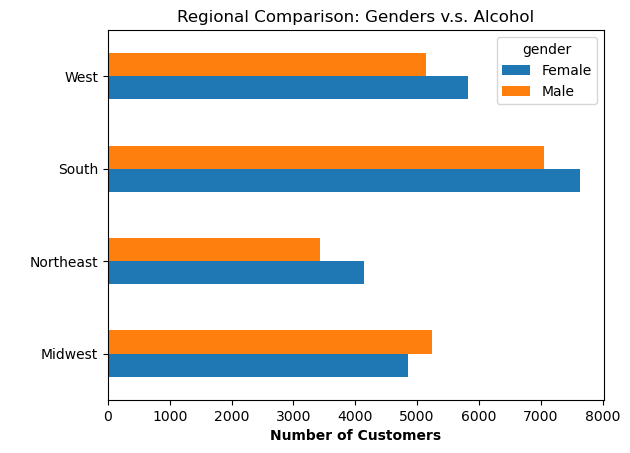

In [73]:
# Create a viz 

cross_gen_alcohol = pd.crosstab(df_alcohol['region'], df_alcohol['gender'], dropna = False)
bar_cross_gen_alcohol = cross_gen_alcohol.plot.barh()

plt.xlabel('Number of Customers', fontweight = 'bold')
plt.ylabel(' ')
plt.title('Regional Comparison: Genders v.s. Alcohol')

plt.show()

In [74]:
# Confirm both genders are evenly represented in the dataframe to avoid bias

small['gender'].value_counts(dropna = False)

Male      4676210
Female    4610784
Name: gender, dtype: int64

In [75]:
# Export viz 

bar_cross_gen_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_gen_alcohol.png'))

### Observations:
**Female customers tend to purchase more alcoholic beverages than their counterparts in all regions, with the exception of the Midwest.**

### -> Create line charts to examine spending trend throughout the day

In [76]:
# To speed up the processing time, reduce the samples to only those columns necessary for the chart

df_2 = small[['order_hour_of_day','prices']]

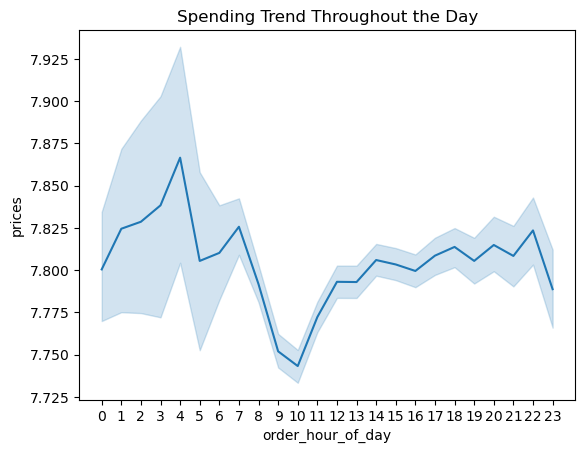

In [77]:
# Create a line chart

line_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Spending Trend Throughout the Day')
plt.xticks(range(0, 24, 1))
plt.show()

In [78]:
# Export viz 

line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'line_hour_prices.png'))

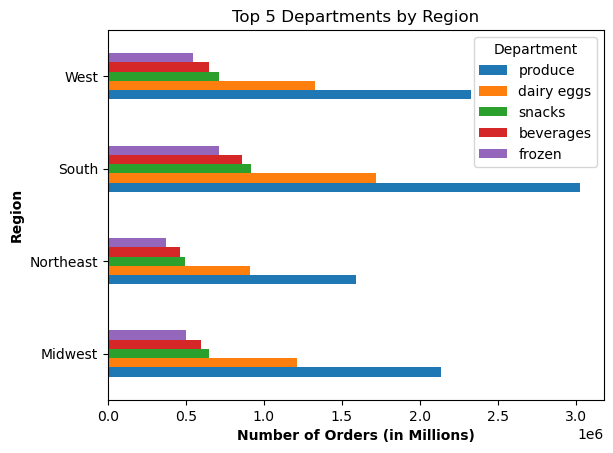

In [79]:
# Examine popularity of departments across regions
# Create a crosstab between region and department 

cross_region_dep = pd.crosstab(ords_prods_custs_noPII_3['region'], ords_prods_custs_noPII_3['department'], dropna = False)

# Sort each region's departments by the number of orders and select the top 5
top5_departments = cross_region_dep.apply(lambda x: x.sort_values(ascending = False).head(5), axis=1)

# Create a horizontal bar chart
bar_cross_region_top5_dep = top5_departments.plot.barh()

plt.xlabel('Number of Orders (in Millions)', fontweight='bold')
plt.ylabel('Region', fontweight='bold')
plt.title('Top 5 Departments by Region')

# Add a legend
plt.legend(title='Department')

plt.show()

In [80]:
# Export viz 

bar_cross_region_top5_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','4.10_Visualizations', 'bar_cross_region_top5_dep.png'))

### Observations:
**All regions consistently reflect the nationwide trend with their respective top 5 departments. These departments, ranked by the number of orders, remain uniform across all regions, reinforcing a cohesive nationwide preference.**

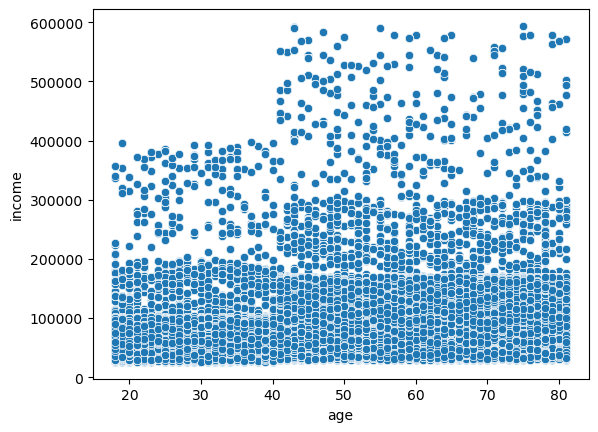

In [81]:
# Explore the relationship between age and income

scatter_age_income_small = sns.scatterplot(x = 'age', y = 'income', data = small)

### Observations:
**1. Across all age groups, the majority of customers have an annual income below 200,000. 
<br> 2. However, there is a concentrated cluster of customers aged over 40 with incomes ranging between 200,000 and 300,000. 
<br> 3. Customers below 40 years of age have a maximum income around 400,000, whereas those older than 40 have a maximum income that reaches as high as 600,000.**

### 9. Produce suitable charts to illustrate your results and export them in your project folder.

Done.

### 10. Tidy up your script, export your final data set, and save your notebook.

In [82]:
# Save dataframe as pkl file

ords_prods_custs_noPII_3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_final.pkl'))